In [1]:
import pandas as pd
import numpy as np
import json
import keras
import random
from keras.layers import Dense, LSTM, Dropout, Masking
from keras.models import Sequential, load_model
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import os

Using TensorFlow backend.


In [2]:
with open('../dati/pad/lines_pad.json', 'r') as f:
    data_lines = json.load(f)

with open('../dati/pad/lines_2_pad.json', 'r') as f:
    data_lines += json.load(f)

for elem in range(len(data_lines)):
    for arr in range(len(data_lines[elem])):
        tmp = []
        for f in range(7):
            tmp.append(data_lines[elem][arr][f])
        data_lines[elem][arr] = tmp

In [3]:
with open('../dati/pad/circles_pad.json', 'r') as f:
    data_circles = json.load(f)

for elem in range(len(data_circles)):
    for arr in range(len(data_circles[elem])):
        tmp = []
        for f in range(7):
            tmp.append(data_circles[elem][arr][f])
        data_circles[elem][arr] = tmp
        

In [4]:
with open('../dati/pad/lines_pad.json', 'r') as f:
    data_lines = json.load(f)

with open('../dati/pad/lines_2_pad.json', 'r') as f:
    data_lines += json.load(f)
    

def generator(data, labels):
    assert len(data) == len(labels)
    while True:
        for elem in range(len(data)):
            #word_array = []
            #for arr in range(len(data[elem])):
            #    tmp = []
            #    for f in range(7):
            #        tmp.append(data[elem][arr][f])
            #    word_array.append(tmp)
            yield np.array(data[elem]), np.array(labels[elem])

g_lines = generator(data_lines, [1] * len(data_lines))

In [5]:
with open('../dati/pad/circles_pad.json', 'r') as f:
    data_circles = json.load(f)
    
g_circles = generator(data_circles, [0] * len(data_circles))

In [6]:
file_recog = 'Antonio_pad.json'
file_path = '../dati/scrittura_di_computer/pad/'
labelled_data_d, labelled_data_g = [], []

for file in os.listdir(file_path):
    if file_recog == file: continue
    with open(os.path.join(file_path, file), 'r') as f:
        data_g = json.load(f)
    for i in range(len(data_g)):
        labelled_data_g.append((data_g[i], 0))
        
        
with open(os.path.join(file_path, file_recog), 'r') as f:
    data_r = json.load(f)
for i in range(len(data_r)):
    labelled_data_d.append((data_r[i], 1))
    
def xy_data(labelled_data):
    x_data, y_labels = [], []
    for i in labelled_data:
        x_data.append(i[0])
        y_labels.append(i[1])
        
    return np.array(x_data), np.array(y_labels)

labelled_data_dg = labelled_data_d * 8 + labelled_data_g  
random.shuffle(labelled_data_dg)

data_dg, label_dg = xy_data(labelled_data_dg)


In [7]:
def create_model():
    model = Sequential()
    model.add(Masking(mask_value=0.0))
    model.add(LSTM(input_shape=(1000, 7), units=64, activation="sigmoid", return_sequences=True, recurrent_activation="hard_sigmoid"))
    model.add(LSTM(units=128, activation="sigmoid", return_sequences=False, recurrent_activation="hard_sigmoid"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [8]:
#neural_network = KerasClassifier(build_fn=create_model, 
#                                 epochs=4,
#                                 steps_per_epoch=140,
#                                 validation_split=0.2,
#                                 validation_steps=36,
#                                 verbose=1)

In [9]:
#plot_model(model_dario, show_shapes=True, to_file='lstm_dropout_model.png')

In [10]:
#hist = model_dario.fit_generator(g_dario_impostors, epochs=5, steps_per_epoch=42)


In [11]:
model = create_model()
cb = keras.callbacks.TensorBoard(log_dir='/usr/Graph', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

hist = model.fit(x = data_dg, y = label_dg, epochs=150, batch_size=32, callbacks=[cb],validation_split=0.33)

#out = cross_val_score(neural_network, data_dg, label_dg, cv=10,)

Train on 389 samples, validate on 193 samples
Epoch 1/150
389/389 [==============================] - 27s 69ms/step - loss: 0.7336 - acc: 0.5039 - val_loss: 0.6549 - val_acc: 0.5855
Epoch 2/150
389/389 [==============================] - 25s 65ms/step - loss: 0.6831 - acc: 0.5758 - val_loss: 0.6372 - val_acc: 0.7461
Epoch 3/150
389/389 [==============================] - 25s 64ms/step - loss: 0.6533 - acc: 0.6170 - val_loss: 0.6130 - val_acc: 0.5959
Epoch 4/150
389/389 [==============================] - 25s 64ms/step - loss: 0.6495 - acc: 0.6170 - val_loss: 0.7495 - val_acc: 0.4145
Epoch 5/150
389/389 [==============================] - 25s 63ms/step - loss: 0.6073 - acc: 0.6992 - val_loss: 0.5615 - val_acc: 0.8031
Epoch 6/150
389/389 [==============================] - 25s 63ms/step - loss: 0.6070 - acc: 0.6864 - val_loss: 0.6573 - val_acc: 0.5855
Epoch 7/150
389/389 [==============================] - 25s 63ms/step - loss: 0.5523 - acc: 0.7224 - val_loss: 0.5648 - val_acc: 0.5855
Epoch 8/1

Epoch 61/150
389/389 [==============================] - 25s 63ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 62/150
389/389 [==============================] - 25s 63ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 63/150
389/389 [==============================] - 25s 64ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 3.1934 - val_acc: 0.5855
Epoch 64/150
389/389 [==============================] - 25s 63ms/step - loss: 0.3668 - acc: 0.9486 - val_loss: 0.0209 - val_acc: 0.9896
Epoch 65/150
389/389 [==============================] - 24s 63ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.7887 - val_acc: 0.6684
Epoch 66/150
389/389 [==============================] - 25s 64ms/step - loss: 0.2534 - acc: 0.9434 - val_loss: 0.0262 - val_acc: 0.9896
Epoch 67/150
389/389 [==============================] - 25s 64ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0231 - val_acc: 0.9896
Epoch 68/150
389/389 [==========================

389/389 [==============================] - 26s 66ms/step - loss: 8.8643e-04 - acc: 1.0000 - val_loss: 0.0139 - val_acc: 0.9896
Epoch 121/150
389/389 [==============================] - 26s 66ms/step - loss: 5.3845e-04 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 0.9948
Epoch 122/150
389/389 [==============================] - 26s 66ms/step - loss: 3.9173e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 123/150
389/389 [==============================] - 25s 65ms/step - loss: 2.2686e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 124/150
389/389 [==============================] - 26s 66ms/step - loss: 1.5517e-04 - acc: 1.0000 - val_loss: 7.8219e-04 - val_acc: 1.0000
Epoch 125/150
389/389 [==============================] - 26s 66ms/step - loss: 1.1143e-04 - acc: 1.0000 - val_loss: 1.2409e-04 - val_acc: 1.0000
Epoch 126/150
389/389 [==============================] - 25s 65ms/step - loss: 5.6964e-05 - acc: 1.0000 - val_loss: 1.1698e-04 - val_acc: 1.0000
Epoch 127/150
3

In [39]:
#out
#!git config --global user.email "antoniomusolino007@gmail.com"
!git stash --include-untracked
#!git add ../.
#!git commit -m 'Aggiunto nuovo codice e salvato modello di Dario ottimale'
#!git push 
#print(out)
#out.mean()

Saved working directory and index state WIP on master: 71b71a4 Upload inizio relazione
HEAD is now at 71b71a4 Upload inizio relazione


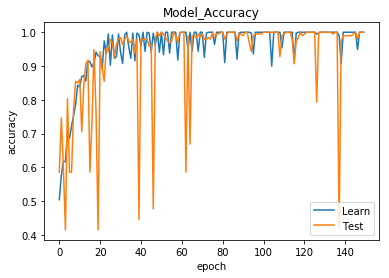

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def gen_mean (curve):
    mean = [0]* len(curve)
    mean[0] = curve[0]
    for i in range(1,len(curve)):
        mean[i] = ((mean[i-1] )*i + out[i])/(i+1)
    return mean
from scipy.ndimage.filters import gaussian_filter1d


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Learn', 'Test'], loc='lower right')
plt.savefig('./150_epoch_accuracy_new_data_antonio')

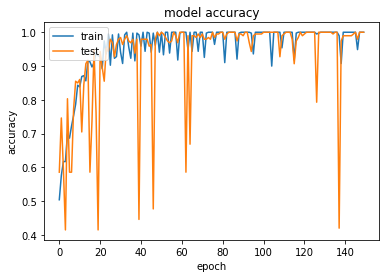

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./model_accuracy_40Epoch_scaled',quality=100,)

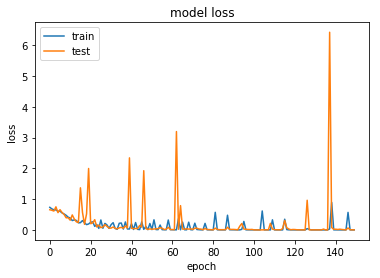

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('./model_loss_40Epoch_scaled')

In [28]:
#model_dario_reloaded = load_model("model_dario_good_performance.h5")
#model_antonio_reloaded = load_model('model_antonio_good_performance.h5')


In [42]:
x, y = xy_data(labelled_data_g)
x1, y1, = xy_data(labelled_data_d)
out_dario_reloaded = model_dario_reloaded.evaluate(x, y)
out_dario_reloaded2 = model_dario_reloaded.evaluate(x1, y1)

print(out_dario_reloaded)
print(out_dario_reloaded2)

35/35 [==============================] - 1s 28ms/step
[0.0007902320327072166, 1.0]
[6.17785091890255e-05, 1.0]


In [24]:

with open('../dati/dati_con_penna/concatenati/pad/antonio_1_concat_antonio_2_pad.json', 'r') as f:
    attack = json.load(f)

attack = np.array(attack)
#print(attack.shape)
model_dario_reloaded.evaluate(attack, np.zeros(attack.shape[0]))
#attack

49/49 [==============================] - 1s 20ms/step


[2.606671415025853e-06, 1.0]